In [1]:
from typing import Optional, Tuple
from astropy.io import fits
from astropy.table import Table
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib.cm as cm
import seaborn as sns
sns.set_theme(style="ticks")

In [8]:
file_ = "../iDR4-SPLUS-PStotal-PSF-175r185_class05_flags4.csv"
df = pd.read_csv(file_)

In [9]:
column1 = ["e_r_PStotal", "e_J0660_PStotal", "e_i_PStotal"]
df[column1][20000:20015]

,e_r_PStotal,e_J0660_PStotal,e_i_PStotal
20000,0.013807,0.012171,0.011227
20001,0.010976,0.012747,0.010101
20002,0.013961,0.015343,0.011655
20003,0.009735,0.011767,0.010050
20004,0.011984,0.014062,0.011615
20005,0.013093,0.015699,0.013780
20006,0.013910,0.013115,0.007268
20007,0.011079,0.013446,0.011462
20008,0.012525,0.014509,0.012635
20009,0.012374,0.015097,0.013625


In [4]:
# Remove magelanic clouds
filtered_df = df[~df['Field'].str.contains('MC')]

In [5]:
filtered_df

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
0,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000122',149.957794,-24.588993,10330.6650,1033.1914,0.000383,1.234561,0.000002,3.242556,...,18.153698,0.071,17.998697,0.065,17.525698,0.051,17.206259,0.043,17.104158,0.051
1,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000137',150.534388,-24.589628,6898.3530,1042.0739,0.000381,1.227902,0.000003,3.074517,...,17.229670,0.049,17.134670,0.048,16.508670,0.041,16.176670,0.126,15.964670,0.041
2,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000200',150.119570,-24.587243,9367.6540,1049.7621,0.000367,1.184599,0.000004,3.030711,...,19.439140,0.128,19.209140,0.086,17.697142,0.046,16.147823,0.038,15.237605,0.038
3,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000231',150.104989,-24.586636,9454.4780,1053.3187,0.000356,1.148883,0.000004,3.193642,...,17.615140,0.065,17.538141,0.058,16.946140,0.042,16.559822,0.034,16.446606,0.041
4,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000251',149.944931,-24.585065,10407.3860,1058.4563,0.000385,1.243178,0.000003,3.187768,...,17.537746,0.061,17.358746,0.063,16.672747,0.051,16.169260,0.038,16.064340,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060847,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048324',358.326089,1.057939,7179.7407,7843.4766,0.000316,0.981167,0.000002,3.362761,...,17.930109,0.032,17.880110,0.028,17.508220,0.026,NaN,NaN,17.148645,0.029
2060848,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048211',357.983195,1.051064,9423.9390,7798.7783,0.000301,0.936742,0.000002,3.218857,...,19.645690,0.094,NaN,NaN,18.314690,0.032,NaN,NaN,16.349434,0.027
2060849,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048420',358.189227,1.301481,8075.3257,9437.8100,0.000336,1.043616,0.000003,3.184011,...,17.896680,0.036,17.764680,0.030,17.265680,0.021,17.067595,0.040,16.788515,0.027
2060850,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048652',357.957820,1.285262,9589.8220,9331.9410,0.000319,0.991412,0.000002,3.517311,...,18.118427,0.033,18.156427,0.034,17.658428,0.025,17.525522,0.044,17.293554,0.037


In [6]:
# Convert the data into an Astropy Table
tab = Table.from_pandas(filtered_df)
len(tab)

1793739

In [7]:
tab.colnames

['Field',
 'ID',
 'RA',
 'DEC',
 'X',
 'Y',
 'FWHM',
 'FWHM_n',
 'ISOarea',
 'KRON_RADIUS',
 'MU_MAX_INST',
 'PETRO_RADIUS',
 'SEX_FLAGS_DET',
 'SEX_NUMBER_DET',
 'CLASS_STAR',
 's2n_DET_PStotal',
 'THETA',
 'ELLIPTICITY',
 'ELONGATION',
 'FLUX_RADIUS_20',
 'FLUX_RADIUS_50',
 'FLUX_RADIUS_70',
 'FLUX_RADIUS_90',
 's2n_r_PStotal',
 's2n_J0660_PStotal',
 's2n_i_PStotal',
 'FWHM_r',
 'FWHM_n_r',
 'FWHM_J0660',
 'FWHM_n_J0660',
 'FWHM_i',
 'FWHM_n_i',
 'SEX_FLAGS_r',
 'SEX_FLAGS_J0660',
 'SEX_FLAGS_i',
 'CLASS_STAR_r',
 'CLASS_STAR_J0660',
 'CLASS_STAR_i',
 'r_PStotal',
 'e_r_PStotal',
 'g_PStotal',
 'e_g_PStotal',
 'i_PStotal',
 'e_i_PStotal',
 'u_PStotal',
 'e_u_PStotal',
 'z_PStotal',
 'e_z_PStotal',
 'J0378_PStotal',
 'e_J0378_PStotal',
 'J0395_PStotal',
 'e_J0395_PStotal',
 'J0410_PStotal',
 'e_J0410_PStotal',
 'J0430_PStotal',
 'e_J0430_PStotal',
 'J0515_PStotal',
 'e_J0515_PStotal',
 'J0660_PStotal',
 'e_J0660_PStotal',
 'J0861_PStotal',
 'e_J0861_PStotal',
 'r_psf',
 'e_r_psf',
 'g

In [8]:
# See the dimesion of the CCD
print(tab['X'].max())
print(tab['Y'].max())

10675.626
10402.077


In [9]:
# Masking, usar FLATS menor que 4
# Masking
m_x =  (tab["J0660_PStotal"] <= 19.4) & (tab["i_PStotal"] <= 19.2)

m_err = (tab["e_r_PStotal"] <= 0.2) &  \
        (tab["e_J0660_PStotal"] <= 0.2) & \
        (tab["e_i_PStotal"] <= 0.2)


m_sn = (tab["s2n_r_PStotal"] >= 10) & \
       (tab["s2n_J0660_PStotal"] >= 10) & \
        (tab["s2n_i_PStotal"] >= 10)

m_ell = (tab["ELLIPTICITY"]) <= 0.2

m_50 = (tab["FLUX_RADIUS_50"]) <= 3

valid_ellipticity_range = (0.1, 0.8)  # Example valid range for ellipticity
valid_elongation_range = (1.0, 3.0)   # Example valid range for elongation
shape_mask = (tab['ELLIPTICITY'] >= valid_ellipticity_range[0]) & \
             (tab['ELLIPTICITY'] <= valid_ellipticity_range[1]) & \
             (tab['ELONGATION'] >= valid_elongation_range[0]) & \
             (tab['ELONGATION'] <= valid_elongation_range[1])

valid_fwhm_range = (0.0008, 1000.0)  # Example valid range for FWHM in pixels
fwhm_mask = (tab['FWHM'] >= valid_fwhm_range[0]) & \
            (tab['FWHM'] <= valid_fwhm_range[1])

mask = m_x & m_err & m_sn & m_ell & m_50# Use fwhm_mask instead of valid_fwhm_range
tab_clean = tab[mask]


In [10]:
len(tab_clean)

1676988

In [11]:
# Define the dimensions of your CCD
ccd_width = int(tab_clean['X'].max())  # Replace with the actual width of your CCD image
ccd_height = int(tab_clean['Y'].max())  # Replace with the actual height of your CCD image

# Define the buffer zone size for corner removal
buffer_size = 50  # Adjust as needed

# Define the corners of the CCD
corners = [(0, 0), (0, ccd_height), (ccd_width, 0), (ccd_width, ccd_height)]

# Create a mask to identify objects in the corners
corner_mask = np.zeros(len(tab_clean), dtype=bool)

for corner in corners:
    corner_x, corner_y = corner
    corner_distance = np.sqrt((tab_clean['X'] - corner_x)**2 + (tab_clean['Y'] - corner_y)**2)
    corner_mask |= corner_distance < buffer_size

# Apply the corner mask to filter out objects in the corners
tab_clean_filtered = tab_clean[~corner_mask]


In [12]:
tab_clean_filtered

Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,MU_MAX_INST,PETRO_RADIUS,SEX_FLAGS_DET,SEX_NUMBER_DET,CLASS_STAR,s2n_DET_PStotal,THETA,ELLIPTICITY,ELONGATION,FLUX_RADIUS_20,FLUX_RADIUS_50,FLUX_RADIUS_70,FLUX_RADIUS_90,s2n_r_PStotal,s2n_J0660_PStotal,s2n_i_PStotal,FWHM_r,FWHM_n_r,FWHM_J0660,FWHM_n_J0660,FWHM_i,FWHM_n_i,SEX_FLAGS_r,SEX_FLAGS_J0660,SEX_FLAGS_i,CLASS_STAR_r,CLASS_STAR_J0660,CLASS_STAR_i,r_PStotal,e_r_PStotal,g_PStotal,e_g_PStotal,i_PStotal,e_i_PStotal,u_PStotal,e_u_PStotal,z_PStotal,e_z_PStotal,J0378_PStotal,e_J0378_PStotal,J0395_PStotal,e_J0395_PStotal,J0410_PStotal,e_J0410_PStotal,J0430_PStotal,e_J0430_PStotal,J0515_PStotal,e_J0515_PStotal,J0660_PStotal,e_J0660_PStotal,J0861_PStotal,e_J0861_PStotal,r_psf,e_r_psf,g_psf,e_g_psf,i_psf,e_i_psf,u_psf,e_u_psf,z_psf,e_z_psf,J0378_psf,e_J0378_psf,J0395_psf,e_J0395_psf,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
str16,str31,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000122',149.95779351072906,-24.588993162849363,10330.665,1033.1914,0.00038261065,1.2345612,1.8906251e-06,3.2425563,15.747024,3.3,0,122,0.99213314,-1.0,63.38025,0.046869636,1.0491744,0.7599424,1.3838506,1.8942882,3.1250036,156.87259,101.99599,154.12143,0.00034374892,1.1873316,0.0003409238,1.1760035,0.0003820278,1.208754,0,0,0,1,1.0,1,17.100937,0.007241213,17.512875,0.009905325,16.987782,0.007548977,18.943214,0.036723442,17.008678,0.0103048645,18.59789,0.046223745,18.338017,0.0561725,17.830439,0.03359472,17.731983,0.03023492,17.328854,0.018526793,17.085691,0.011137183,17.013006,0.018119635,17.24526,0.042,17.726698,0.05,17.115269,0.043,18.95029,0.057,17.132158,0.054,18.81129,0.077,18.74629,0.086,18.153698,0.071,17.998697,0.065,17.525698,0.051,17.206259,0.043,17.104158,0.051
b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000137',150.53438843177778,-24.589628435940263,6898.353,1042.0739,0.00038054702,1.2279025,3.4311345e-06,3.0745165,14.598402,3.3,0,137,0.99398494,-1.0,38.559303,0.03316146,1.0342989,0.7967273,1.4267539,1.9917338,3.344412,278.59686,182.10898,287.5899,0.00036752614,1.2694596,0.0003358316,1.1584381,0.00036128578,1.1431252,0,0,0,1,1.0,1,16.004187,0.0038981058,16.617268,0.0057483967,15.82434,0.0037762108,18.087593,0.019878823,15.747891,0.0046636253,17.875431,0.02720515,17.584835,0.031538,17.0448,0.018430522,16.962421,0.016910516,16.379196,0.010099939,15.969298,0.0059634624,15.847172,0.008594431,16.20967,0.049,17.02367,0.074,16.07267,0.092,18.15267,0.033,15.90867,0.053,18.06767,0.059,17.77167,0.061,17.22967,0.049,17.13467,0.048,16.50867,0.041,16.17667,0.126,15.96467,0.041
b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000200',150.11957039012938,-24.587242536374468,9367.654,1049.7621,0.00036712646,1.1845987,4.341435e-06,3.0307114,14.711621,2.73,0,200,0.9839166,-1.0,53.936256,0.041659474,1.0434704,0.76500875,1.3572338,1.9058846,3.2659552,233.59898,179.95032,350.41513,0.00032835378,1.1341558,0.000337384,1.1637931,0.00037013862,1.171136,0,0,0,1,1.0,1,16.375492,0.0047603296,17.722355,0.010712487,15.453132,0.0032450508,20.452156,0.11532847,15.037291,0.0032002802,20.161882,0.15378125,19.884365,0.18437172,18.954592,0.07382566,19.065292,0.0773291,17.526749,0.020311905,16.034016,0.0061795283,15.143249,0.0059443526,16.499823,0.035,17.899141,0.04,15.567702,0.037,20.665731,0.136,15.157605,0.038,--,--,--,--,19.43914,0.128,19.20914,0.0

In [13]:
ri = tab_clean["r_PStotal"] - tab_clean["i_PStotal"]
rj660 = tab_clean["r_PStotal"] - tab_clean["J0660_PStotal"]

In [14]:
def equation(m, c, x):
    # Define your equation here, for example, a linear equation: y = mx + c
    y = m * x + c
    return y

In [15]:
def plots(
    color1: np.ndarray,
    color2: np.ndarray,
    x_values: np.ndarray,
    y_values: np.ndarray,
    y_values1: Optional[np.ndarray] = None,
    sample_size: Optional[int] = None,
    xlim: Optional[Tuple[float, float]] = None,
    ylim: Optional[Tuple[float, float]] = None,
    density_method: str = "gaussian_kde",
    colormap: str = "viridis",
    label1: str = None,
    label2: str = None,
    label3: str = None,
    title: str = "Scatter Plot with Density Coloring"
) -> None:
    """
    Plots a scatter plot with points colored based on their density and one or two lines 
    defined by x_values, y_values, and optionally y_values1.
    """

    # Handle sampling and duplicate colors, ensuring equal lengths
    if sample_size is not None:
        unique_indices = np.random.choice(len(color1), size=sample_size, replace=False)
        color1, color2 = color1[unique_indices], color2[unique_indices]

    # Calculate density
    xy = np.vstack([color1, color2])
    if density_method == "gaussian_kde":
        density = gaussian_kde(xy)(xy)
    else:
        raise NotImplementedError(f"Density method {density_method} not supported.")

    # Sort points by density
    sorted_indices = density.argsort()[::-1]  # Descending order
    color1, color2, density = color1[sorted_indices], color2[sorted_indices], density[sorted_indices]

    # Create plot
    fig, ax = plt.subplots(figsize=(14, 11))

    # Customize scatter plot
    scatter_collection = ax.scatter(
        color1,
        color2,
        c=density,
        s=10,
        cmap=colormap,
        alpha=0.8,
        label=label1 if label1 else "Color 1"
    )

    # Customize colorbar
    plt.colorbar(scatter_collection, label="Density")

    # Customize line plots
    plt.plot(x_values, y_values, linewidth=2, color="red", label=label2 if label2 else "Line 1")
    if y_values1 is not None:
        plt.plot(x_values, y_values1, linewidth=2, color="blue", label=label3 if label3 else "Line 2")

    # Set limits
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    # Add labels and title
    plt.xlabel(label1 if label1 else "Color 1")
    plt.ylabel(label2 if label2 else "Color 2")
    plt.title(title)

    # Add legend if labels are provided
    if label1 or label2 or label3:
        plt.legend()

    plt.show()

In [16]:
# Generate x values
x_values = np.linspace(-10, 10, 100)  # Generate 100 x values from 0 to 10

# Compute y values using the equation
y_values = equation(0.35, -0.35, x_values)

In [17]:
y_values1 = equation(0.35, 0.30, x_values)

In [18]:
print(len(ri), len(rj660), len(x_values), len(y_values), len(y_values1))

1676988 1676988 100 100 100


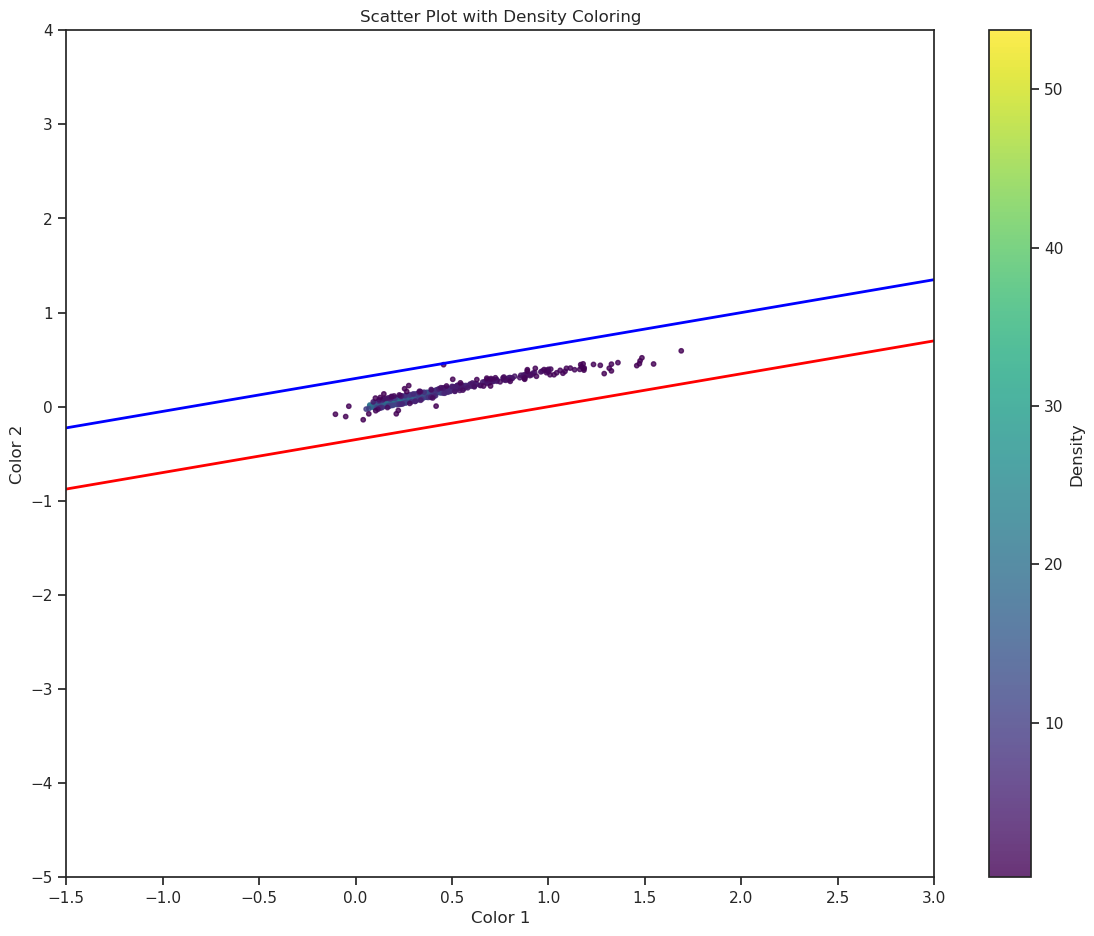

In [19]:
plots(ri, rj660, x_values, y_values, y_values1, xlim=(-1.5, 3), ylim=(-5, 4), sample_size=1000)

In [20]:
# Select objects below the line
# below_line = rj660 < equation(ri)
color_crit = (rj660  <= 0.35*ri - 0.35)

# upper_line = rj660 < equation(ri)
color_crit_upper = (rj660 >= 0.35*ri + 0.30)

In [21]:
tab_clean_below = tab_clean[color_crit]

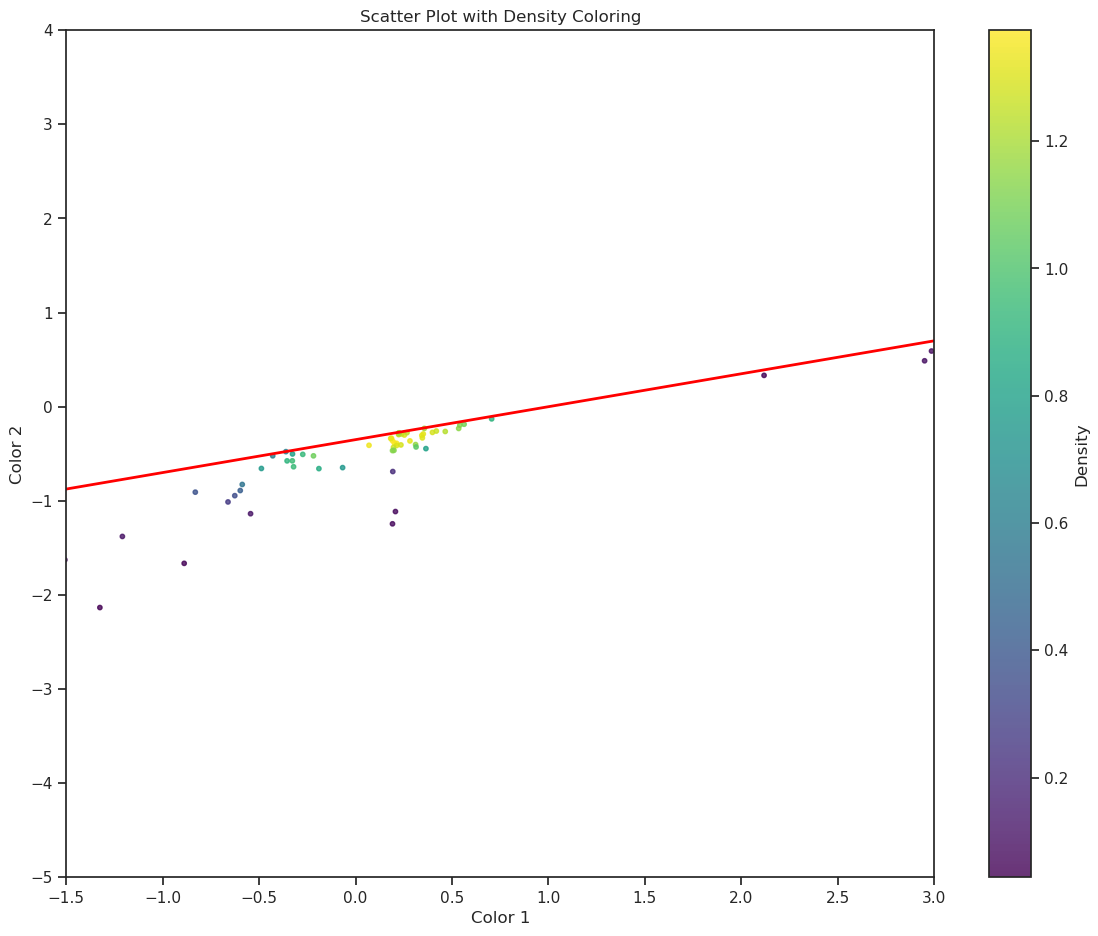

In [22]:
ri_below = tab_clean_below["r_PStotal"] - tab_clean_below["i_PStotal"]
rj660_below = tab_clean_below["r_PStotal"] - tab_clean_below["J0660_PStotal"]



plots(ri_below, rj660_below, x_values, y_values, xlim=(-1.5, 3), ylim=(-5, 4))


In [23]:
tab_clean_below

Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,MU_MAX_INST,PETRO_RADIUS,SEX_FLAGS_DET,SEX_NUMBER_DET,CLASS_STAR,s2n_DET_PStotal,THETA,ELLIPTICITY,ELONGATION,FLUX_RADIUS_20,FLUX_RADIUS_50,FLUX_RADIUS_70,FLUX_RADIUS_90,s2n_r_PStotal,s2n_J0660_PStotal,s2n_i_PStotal,FWHM_r,FWHM_n_r,FWHM_J0660,FWHM_n_J0660,FWHM_i,FWHM_n_i,SEX_FLAGS_r,SEX_FLAGS_J0660,SEX_FLAGS_i,CLASS_STAR_r,CLASS_STAR_J0660,CLASS_STAR_i,r_PStotal,e_r_PStotal,g_PStotal,e_g_PStotal,i_PStotal,e_i_PStotal,u_PStotal,e_u_PStotal,z_PStotal,e_z_PStotal,J0378_PStotal,e_J0378_PStotal,J0395_PStotal,e_J0395_PStotal,J0410_PStotal,e_J0410_PStotal,J0430_PStotal,e_J0430_PStotal,J0515_PStotal,e_J0515_PStotal,J0660_PStotal,e_J0660_PStotal,J0861_PStotal,e_J0861_PStotal,r_psf,e_r_psf,g_psf,e_g_psf,i_psf,e_i_psf,u_psf,e_u_psf,z_psf,e_z_psf,J0378_psf,e_J0378_psf,J0395_psf,e_J0395_psf,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
str16,str31,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
b'HYDRA-0014',b'iDR4_3_HYDRA-0014_0057143',155.4801030612275,-23.437723906296405,4927.038,8583.094,0.00055343256,1.7136217,1.3070988e-06,3.3986895,15.407689,3.3,2,57143,0.99944943,-1.0,-35.194386,0.13236082,1.1525528,0.7891049,1.443394,1.9837314,2.9244041,173.59485,81.026535,121.1181,0.0007520329,2.3885586,0.00054400024,1.7240095,0.0014353624,4.6548777,2,2,2,1,1.0,1,16.974321,0.0063366676,19.698713,0.03536457,17.518805,0.009115438,21.97872,0.30790123,17.119694,0.010373652,22.533998,0.88171196,22.179087,1.0339998,21.063705,0.3257904,21.242203,0.36934507,19.557297,0.06973683,18.111303,0.013575956,17.226086,0.01460614,18.23037,0.481,19.757618,0.046,17.582384,0.027,--,--,17.173298,0.028,--,--,--,--,--,--,--,--,19.610617,0.07,18.15037,0.026,17.345299,0.027
b'HYDRA-0021',b'iDR4_3_HYDRA-0021_0052429',150.4660820078083,-24.95970964968348,9670.938,7718.149,0.00030397874,1.0729158,2.1940587e-06,3.176281,15.373144,2.73,0,52429,0.9703262,-1.0,-18.402771,0.053194523,1.0561832,0.6682802,1.3064929,1.7978483,3.4086807,152.83377,114.53295,174.74612,0.0003233852,1.1100123,0.00033236874,1.0918707,0.00029851412,1.0456035,0,0,0,1,1.0,1,17.251194,0.0069864024,17.961157,0.010622361,16.83251,0.0063813888,19.680658,0.061375853,16.619095,0.007667846,18.97818,0.05044229,18.576033,0.056179557,18.350233,0.041165482,18.384754,0.03889637,18.029028,0.026014915,17.509892,0.009322716,17.131107,0.013259231,17.321526,0.034,18.03001,0.024,16.912964,0.031,19.7327,0.068,16.701822,0.037,19.0277,0.073,18.665699,0.07,18.389011,0.055,18.420012,0.054,18.139011,0.042,17.551527,0.031,17.198822,0.036
b'HYDRA-0023',b'iDR4_3_HYDRA-0023_0005695',153.56582076171424,-25.87570405449292,9740.49,1721.5636,0.00033206874,0.99573535,1.5171682e-06,3.5183122,15.147719,3.3,0,5695,0.9870663,-1.0,-4.022741,0.06404811,1.068431,0.77464706,1.3772616,1.9846504,3.5848484,125.56006,95.46441,137.6603,0.00032893335,0.9508291,0.0003199064,0.9754699,0.00033698505,1.0015194,0,0,0,1,1.0,1,17.428705,0.008830216,18.225952,0.016613863,17.072115,0.008232475,19.773268,0.06233052,16.965431,0.010463478,19.372639,0.06937832,19.253235,0.09139745,18.677746,0.05965752,18.637915,0.05427919,18.010414,0.029243287,17.659607,0.011613986,17.23409,0.016619377,17.499542,0.027,18.30748,0.032,17.129864,0.022,19.781588,0.075,17.032173,0.039,19.374588,0.068,19.329588,0.099,18.86734,0.081,18.66334,0.063,18.09048,0.039,17.72976,0.031,1

In [24]:
    tab_clean_upper = tab_clean[color_crit_upper]
    tab_clean_upper

Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,MU_MAX_INST,PETRO_RADIUS,SEX_FLAGS_DET,SEX_NUMBER_DET,CLASS_STAR,s2n_DET_PStotal,THETA,ELLIPTICITY,ELONGATION,FLUX_RADIUS_20,FLUX_RADIUS_50,FLUX_RADIUS_70,FLUX_RADIUS_90,s2n_r_PStotal,s2n_J0660_PStotal,s2n_i_PStotal,FWHM_r,FWHM_n_r,FWHM_J0660,FWHM_n_J0660,FWHM_i,FWHM_n_i,SEX_FLAGS_r,SEX_FLAGS_J0660,SEX_FLAGS_i,CLASS_STAR_r,CLASS_STAR_J0660,CLASS_STAR_i,r_PStotal,e_r_PStotal,g_PStotal,e_g_PStotal,i_PStotal,e_i_PStotal,u_PStotal,e_u_PStotal,z_PStotal,e_z_PStotal,J0378_PStotal,e_J0378_PStotal,J0395_PStotal,e_J0395_PStotal,J0410_PStotal,e_J0410_PStotal,J0430_PStotal,e_J0430_PStotal,J0515_PStotal,e_J0515_PStotal,J0660_PStotal,e_J0660_PStotal,J0861_PStotal,e_J0861_PStotal,r_psf,e_r_psf,g_psf,e_g_psf,i_psf,e_i_psf,u_psf,e_u_psf,z_psf,e_z_psf,J0378_psf,e_J0378_psf,J0395_psf,e_J0395_psf,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
str16,str31,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
b'HYDRA-0014',b'iDR4_3_HYDRA-0014_0040477',155.15874147191832,-23.75442669396225,6853.704,6509.1787,0.00031687832,0.98116666,2.4041283e-06,3.1619987,14.899951,3.3,0,40477,0.9823297,-1.0,-78.844795,0.03654635,1.0379326,0.725598,1.335549,1.9137044,3.5088816,162.64566,179.9368,164.706,0.0003103413,0.9856861,0.00035699544,1.1313663,0.00029887262,0.9692434,0,0,0,1,1.0,1,17.133547,0.0068059224,17.606304,0.010110394,16.994621,0.0066465056,18.985783,0.0308269,16.919777,0.0089244675,18.313334,0.031478256,18.194162,0.042131867,17.937925,0.030782199,17.841686,0.028533898,17.423563,0.017766166,16.664797,0.0061519025,16.952276,0.012104731,17.200956,0.023,17.665314,0.016,17.07199,0.034,19.081589,0.043,16.97586,0.03,18.40659,0.032,18.334589,0.042,18.018314,0.036,17.940313,0.03,17.488314,0.023,16.955956,0.087,17.08386,0.03
b'HYDRA-0024',b'iDR4_3_HYDRA-0024_0023328',155.32350062751797,-25.448560916252635,8577.831,4523.1514,0.000330169,0.98835254,2.1473766e-06,3.827773,15.203971,3.3,2,23328,0.9498747,-1.0,-14.556669,0.07719135,1.0836482,0.83824617,1.5794955,2.4446743,4.464232,123.44159,128.06139,104.34564,0.00035772196,0.95920926,0.00035244916,0.9359822,0.00027714815,0.9395038,2,2,2,1,1.0,1,17.482685,0.008869596,17.77183,0.011119968,17.485254,0.010462768,18.0776,0.018587358,17.035652,0.012133323,17.629211,0.022268103,17.851065,0.03371995,17.776094,0.028590234,17.679016,0.025311518,17.679255,0.020593638,17.172346,0.008549627,17.34053,0.019380143,17.56991,0.023,17.834438,0.016,17.608467,0.03,18.167429,0.028,17.162973,0.052,17.702429,0.031,17.950428,0.036,17.85344,0.031,17.74844,0.028,17.74844,0.029,17.213911,0.027,17.601973,0.056
b'HYDRA-0033',b'iDR4_3_HYDRA-0033_0044128',154.09468089895353,-26.596423316043342,9259.074,6101.5586,0.00034481758,1.0076816,3.0343365e-06,3.0264537,14.592131,3.3,3,44128,0.9997301,-1.0,-60.54552,0.17058998,1.2056763,0.7923751,1.48544,2.1438386,3.6832442,199.50327,243.82382,341.2814,0.000342057,1.0242258,0.001002159,2.915708,0.00033938742,1.0247777,3,3,3,1,1.0,1,17.272253,0.0053164675,18.56898,0.012466159,16.206799,0.0031748158,21.508265,0.1585758,15.740441,0.0031260534,20.767805,0.13837737,20.809618,0.20152071,19.692587,0.0713507,19.661432,0.06482391,18.37959,0.021534858,16.46932,0.004350078,15.845325,0.004568004,17.061152,0.017,18.410578,0.018,16.226578,0.018,21.348616,0.155,15.829982,0.019,--,--,20.600616,0.171,19.957474,0.079,1

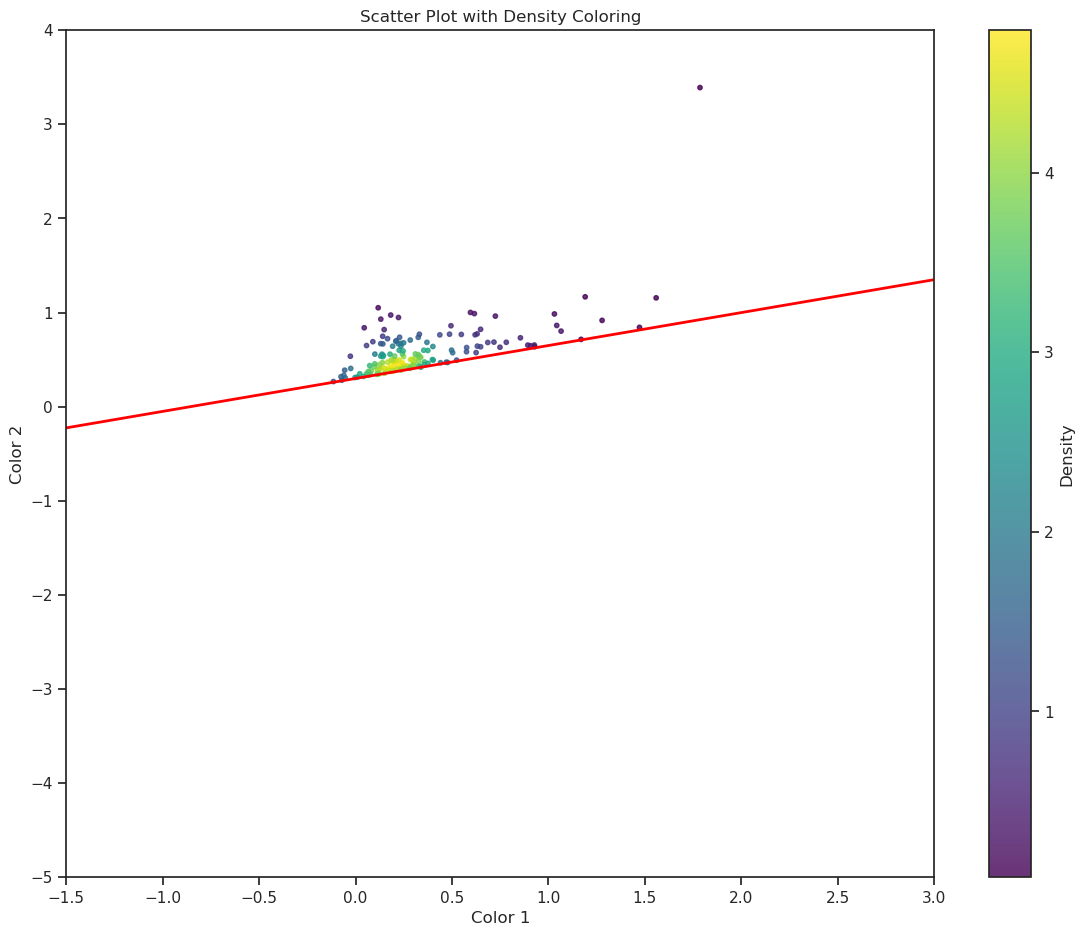

In [25]:
ri_upper = tab_clean_upper["r_PStotal"] - tab_clean_upper["i_PStotal"]
rj660_upper = tab_clean_upper["r_PStotal"] - tab_clean_upper["J0660_PStotal"]


plots(ri_upper, rj660_upper, x_values, y_values1, xlim=(-1.5, 3), ylim=(-5, 4))


In [26]:
len(tab_clean_below["Field"])
   

62

In [27]:
# Saving
# Save the table as a CSV file
#tab_clean_below.write('iDR4-SPLUS-PStotal-PSF-16r175_class06_flags4_bellow.csv', format='csv', overwrite=True)


Examining the position of these object on the CCD

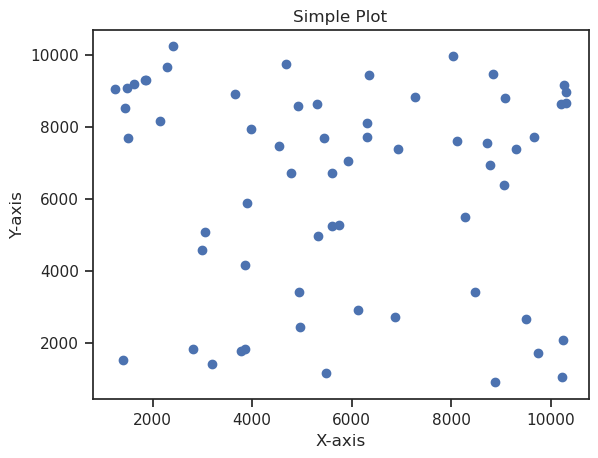

In [28]:
# Create a plot
plt.plot(tab_clean_below["X"], tab_clean_below['Y'], "o")

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()


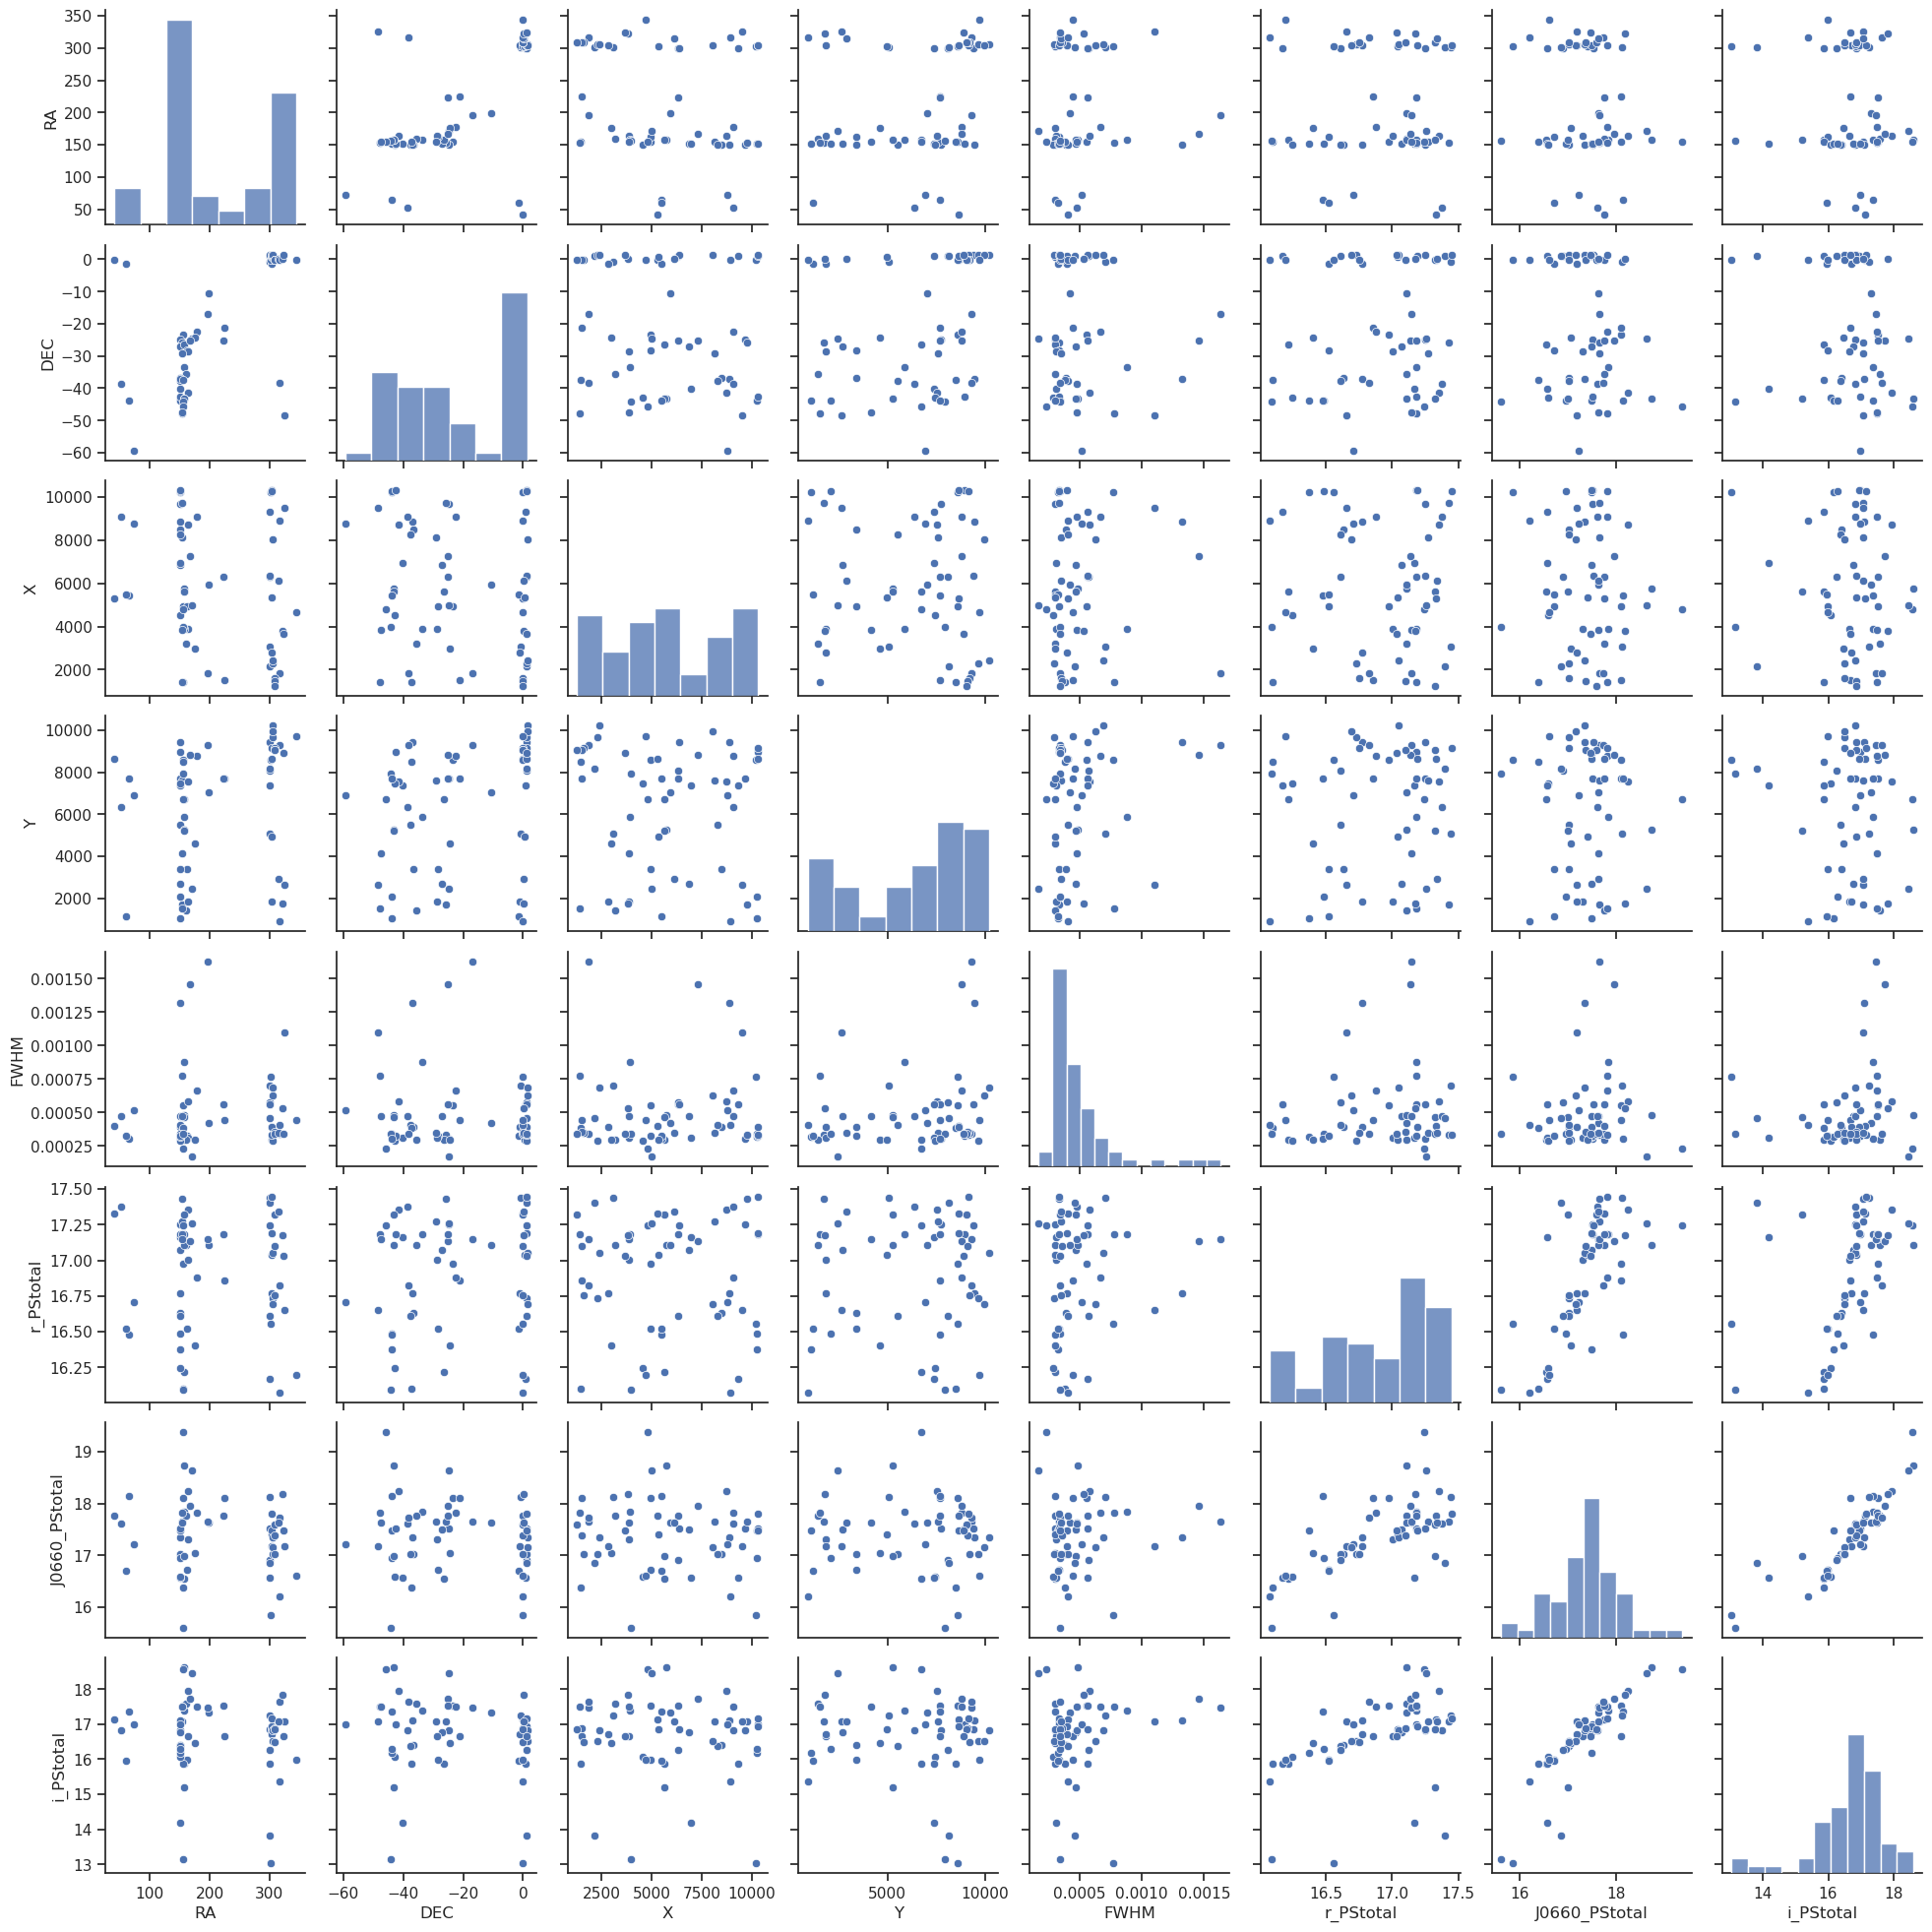

In [29]:
df_bellow = tab_clean_below.to_pandas()
#Select columns 
df_bellow_ = df_bellow[["RA", "DEC", "X", "Y", "FWHM", "r_PStotal", "J0660_PStotal", "i_PStotal"]]
             
sns.pairplot(df_bellow_)

### Object in the upper region

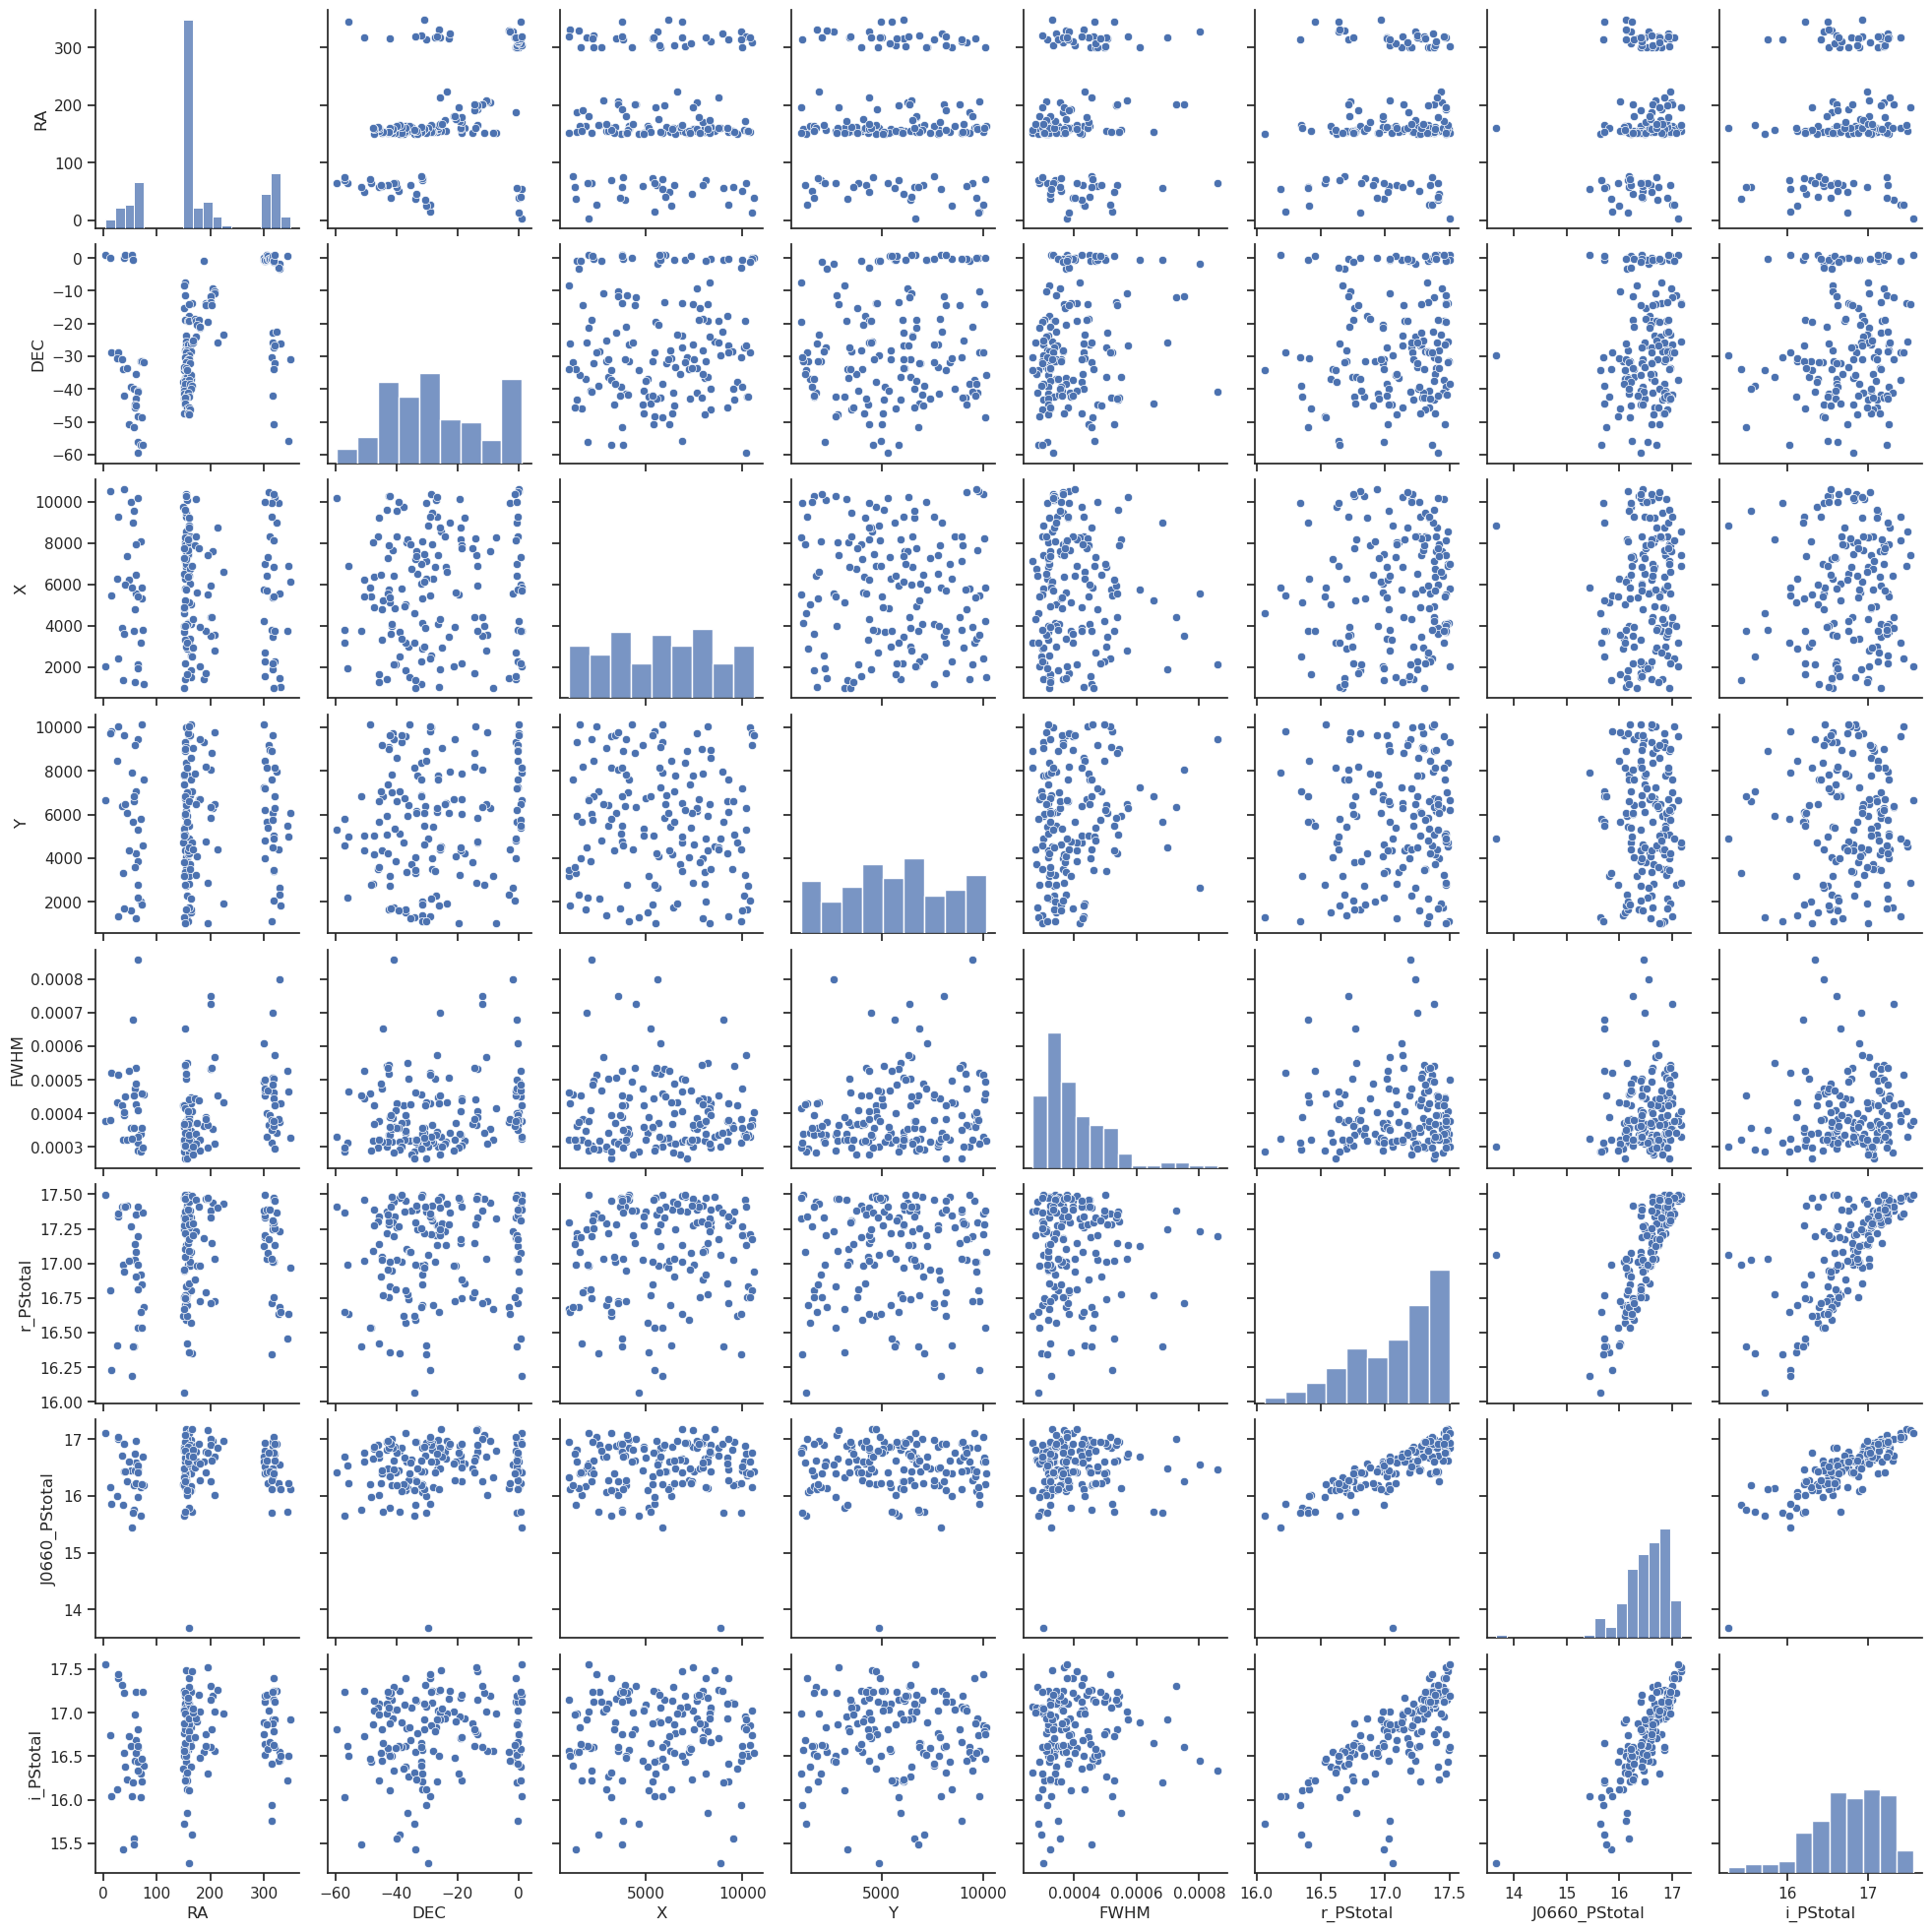

In [30]:
df_upper = tab_clean_upper.to_pandas()
#Select columns 
df_upper_ = df_upper[["RA", "DEC", "X", "Y", "FWHM", "r_PStotal", "J0660_PStotal", "i_PStotal"]]
             
sns.pairplot(df_upper_)

### JUST ONE FIELD

In [31]:
mask_field = tab_clean["Field"] == "b'STRIPE82-0170'"
tab_clean_field = tab_clean[mask_field]

In [32]:
tab_clean_field

Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,MU_MAX_INST,PETRO_RADIUS,SEX_FLAGS_DET,SEX_NUMBER_DET,CLASS_STAR,s2n_DET_PStotal,THETA,ELLIPTICITY,ELONGATION,FLUX_RADIUS_20,FLUX_RADIUS_50,FLUX_RADIUS_70,FLUX_RADIUS_90,s2n_r_PStotal,s2n_J0660_PStotal,s2n_i_PStotal,FWHM_r,FWHM_n_r,FWHM_J0660,FWHM_n_J0660,FWHM_i,FWHM_n_i,SEX_FLAGS_r,SEX_FLAGS_J0660,SEX_FLAGS_i,CLASS_STAR_r,CLASS_STAR_J0660,CLASS_STAR_i,r_PStotal,e_r_PStotal,g_PStotal,e_g_PStotal,i_PStotal,e_i_PStotal,u_PStotal,e_u_PStotal,z_PStotal,e_z_PStotal,J0378_PStotal,e_J0378_PStotal,J0395_PStotal,e_J0395_PStotal,J0410_PStotal,e_J0410_PStotal,J0430_PStotal,e_J0430_PStotal,J0515_PStotal,e_J0515_PStotal,J0660_PStotal,e_J0660_PStotal,J0861_PStotal,e_J0861_PStotal,r_psf,e_r_psf,g_psf,e_g_psf,i_psf,e_i_psf,u_psf,e_u_psf,z_psf,e_z_psf,J0378_psf,e_J0378_psf,J0395_psf,e_J0395_psf,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
str16,str31,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0000376',358.73307506277445,-0.0002457514797156,4516.001,916.8456,0.00034253247,1.0643663,3.1043596e-06,3.1825385,14.31372,2.73,0,376,0.9772955,-1.0,77.54652,0.094512045,1.1043769,0.74419194,1.4020096,2.00239,3.8585908,196.8768,168.75116,203.13654,0.00033360563,1.0058557,0.0003862898,0.9830136,0.0003564836,1.1263863,0,0,0,1,--,1,16.698368,0.0054479637,17.330528,0.008230595,16.492426,0.0052505173,18.884245,0.028267596,16.399261,0.0068080314,18.728657,0.037027687,18.529358,0.04635931,17.897818,0.029138096,17.77954,0.02595156,17.112928,0.01468836,16.66341,0.0063559725,16.464136,0.009308101,16.777752,0.024,17.383087,0.019,16.5728,0.027,18.89851,0.03,16.491112,0.04,18.74451,0.033,--,--,--,--,17.862087,0.028,17.171087,0.022,--,--,16.572111,0.04
b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0000462',358.94991838192817,0.0052723879779816,3096.529,952.97034,0.0003287349,1.0214926,4.0146606e-06,3.0315816,13.920073,2.73,0,462,0.99983776,-1.0,-83.36617,0.03877461,1.0403388,0.736399,1.3600565,1.916877,3.417428,246.47287,213.56808,275.32648,0.00034245107,1.0325255,0.00042443426,1.0800819,0.0003181014,1.0051095,0,0,0,1,--,1,16.220375,0.0043602465,17.051006,0.0072605754,15.909916,0.0039136517,19.034384,0.031037467,15.740455,0.00462858,18.794521,0.038271967,18.660553,0.05054761,17.791328,0.02742098,17.579954,0.02327588,16.904232,0.013298733,16.143242,0.005032037,15.788416,0.0064000404,16.283688,0.015,17.09938,0.018,15.966249,0.019,19.042286,0.035,15.808601,0.031,18.796286,0.044,--,--,17.83238,0.03,17.67038,0.025,16.97038,0.021,--,--,15.881601,0.038
b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0000453',358.72518747022553,0.0034336334086949,4567.634,940.93243,0.00033050953,1.027007,2.4274693e-06,3.195617,14.526131,2.73,2,453,0.99933124,-1.0,-72.37117,0.051905394,1.0547471,0.7371156,1.3317515,1.8673708,3.3221092,140.06505,141.42216,238.36285,0.00032827092,0.98977095,0.00040652714,1.0345126,0.000330101,1.0430249,2,2,2,1,--,1,17.33659,0.0076577105,18.731905,0.018024266,16.194252,0.004474573,21.723688,0.25377792,15.670644,0.004420139,21.252659,0.2560851,21.046284,0.32094753,20.305704,0.16305512,19.812239,0.10287264,18.452036,0.03182425,16.993103,0.007584226,15.798981,0.006384259,17.402752,0.022,18.763086,0.026,16.2568,0.024,--,--,15.7381115,0.029,--,--,--,--,20.246964,0.151,--,--,18.516962,0.037,--,--,15.8997345,0.038
b'STRIPE82-01

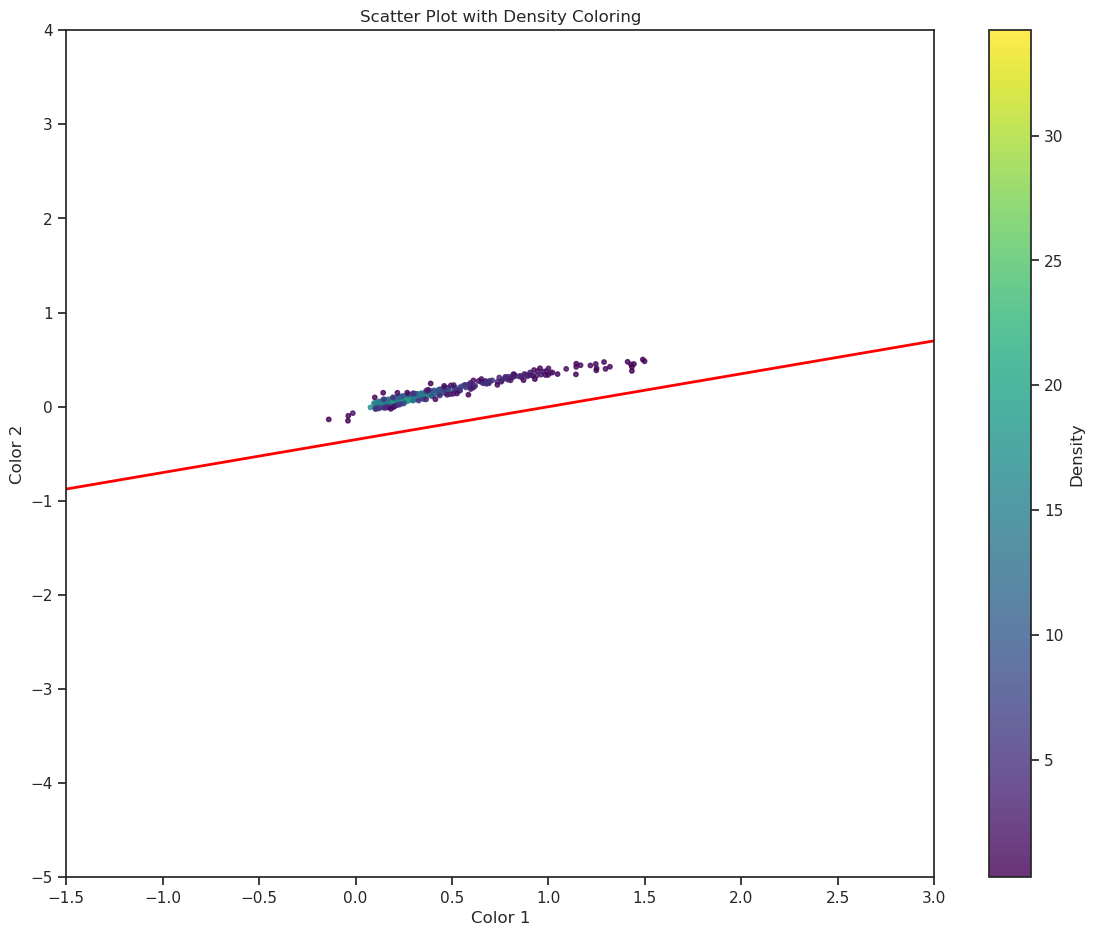

In [33]:
plots(tab_clean_field["r_PStotal"] - tab_clean_field["i_PStotal"], tab_clean_field["r_PStotal"] - tab_clean_field["J0660_PStotal"], x_values, y_values, xlim=(-1.5, 3), ylim=(-5, 4))

In [34]:
import multiprocessing
import dask.dataframe as dd

# Get the number of CPU cores
num_cores = multiprocessing.cpu_count()

# Set n equal to the number of CPU cores
n = num_cores
print(n)

12


In [ ]:
#tab_clean_df = tab_clean.to_pandas()
# Process data in chunks
# Convert Astropy Table to pandas DataFrame
# Assuming `n` is the number of partitions you want
tab_clean_df = tab_clean.to_pandas()

print(tab_clean_df.info(memory_usage='deep'))

#print(tab_clean_df)
#Save Pandas DataFrame to CSV file
#tab_clean_df.to_csv(file_.replace(".csv", "_clean.csv"), index=False)